## Final Project Submission

Please fill out: 
* Student name:    1.Kelvin Mutua

                  2. Hannah Nyambura 

                  3. Samwel Kipkemboi

                  4. 

                  5.
                 
* Student pace:      HYBRID
* Scheduled project review date/time: 
* Instructor name:     SAMUEL KARU
* Blog post URL:


# MICROSOFT MOVIE STUDIO INSIGHT
---


# PROJECT OVERVIEW
- The aim of this project is to analyze which type of films are currently doing the best at the box office to help the company decide which type of films to create.

# BUSINESS PROBLEM
- A company has decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of this company's new movie studio can use to help decide what type of films to create.



# OBJECTIVES
* To determine which movie genres perform highly in terms of revenue and viewer rating.
* To determine which directors and actors are linked to the highest performing movies.
* To determine whether movie budget affects the overall performance of a movie.

# PROJECT GOAL

- To identify the key factors that drive movie success (financially and with audiences) in order to guide the new movie studio on what types of films to produce, invest in, and promote.

## Importing the necessary libraries

In [2]:
import pandas as pd
import gzip
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

## Loading Datasets

### 1. im.db Database

In [3]:
# Unzip the archive manually 
import zipfile
import os

zip_path = './zippedData/im.db.zip'  # replace with actual file
extract_path = './zippedData/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping done!")


Unzipping done!


In [4]:
# Load the imdb database
conn = sqlite3.connect('./zippedData/im.db')
pd.read_sql("SELECT name FROM sqlite_master WHERE type=='table';" ,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


**Tables to use:**
>* movie_basics
>* directors
>* movie_ratings
>* persons

In [5]:
# loading movie_ratings
pd.read_sql("SELECT * FROM movie_ratings", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
# display movie_basics table
pd.read_sql("SELECT * FROM movie_basics", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
# display persons table
pd.read_sql("SELECT * FROM persons", conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [8]:
# display directors table
pd.read_sql("SELECT * FROM directors", conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


### 2. tn.movie_budgets Dataset

In [9]:
# Load the tn.movie_budgets dataset
movie_budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz', compression='gzip', index_col='id')
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Cleaning

### 1. imdb Dataset

In [10]:
#Create a function to check for duplicates in a table
def duplicates(table_name): #defines a function named duplicates that takes one input parameter:
    return pd.read_sql(f"SELECT * FROM {table_name}", conn).duplicated().sum()

`.duplicated()`
This Pandas method returns a Boolean Series that flags whether each row in the DataFrame is a duplicate of a previous row (based on all columns by default).

Count of Duplicates and Non-Duplicates
`.value_counts()`
This counts how many True (duplicate rows) and False (unique rows) values are returned by `.duplicated()`.

In [11]:
# Create a function to check for missing values in a table
def missing(table_name):
    return pd.read_sql(f"SELECT * FROM {table_name}", conn).isna().sum()

`pd.read_sql(...)`: Reads all rows from the specified SQL table into a Pandas DataFrame.

`.isna()`: Checks each value in the DataFrame for missing data (i.e., NaN).

`.sum()`: Aggregates the number of missing values in each column.

In [12]:
#Check for duplicates
duplicates('movie_basics')

0

This means all 146,144 rows are unique, and no duplicates were found in the `movie_basics table`, indicating good data integrity for this dataset.

In [13]:
# Check for missing values
missing('movie_basics')

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Ther are 21 missing values in `original_title`, 31739 in runtime_minutes and 5408 in `genres`.

WE fill `runtime_minutes` with median for these reason:
> The median is a robust statistic that better represents the "typical" movie length when the data is skewed.

> It prevents distortion in the dataset that could happen if extremely long or short runtimes heavily influence the mean.

In [14]:
# Assign the movie_basics table to a DataFrame
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

# Fillthe missing values in the runtime_minutes column with the median value of the column
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())
movie_basics.isna().sum()

movie_id              0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

> The number of remaining missing rows was likely small relative to the overall dataset, so removing them minimized data loss.



In [15]:
# Drop rows with missing values
movie_basics.dropna(inplace=True)
movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [16]:
# Save the cleaned DataFrame back to the database
movie_basics.to_sql('movie_basics',conn, if_exists='replace', index=False)

In [17]:
# Check for duplicates
duplicates('movie_ratings')

0

In [18]:
# Check for missing values
missing('movie_ratings')

movie_id         0
averagerating    0
numvotes         0
dtype: int64

There are no duplicates and missing values in `movie_rating`.
Thats make the table perfect to work with.

In [19]:
# Check for duplicates
duplicates('directors')

127639

> The duplicate check showed that 127,639 rows were exact duplicates, indicating a high level of redundancy in the directors table.

> Using drop_duplicates() removes all repeated rows, keeping only the first occurrence of each.

This ensures that:

> The dataset is clean and efficient.

> Analyses involving director data (e.g., frequency counts, joins with other tables) are not skewed or inflated by repeated entries.


In [20]:
# Assign the directors table to a DataFrame
directors = pd.read_sql('SELECT * FROM directors',conn)

# Drop duplicates in the directors DataFrame
directors.drop_duplicates(inplace=True)
directors.duplicated().sum()

0

In [21]:
# Save the cleaned DataFrame back to the database
directors.to_sql('directors',conn, if_exists='replace',index=False)

> The step above is important for: 
- It ensures the cleaned data is stored persistently in the database for use in further analysis or merging with other tables.

- Replacing the old table avoids confusion or errors caused by outdated, duplicate-filled data.

In [22]:
# Check for missing values
missing('directors')

movie_id     0
person_id    0
dtype: int64

### 2. Movie_Budgets Dataset

In [23]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
# Drop the columns that are not needed for the analysis
movie_budgets = movie_budgets.drop(columns = ['release_date','domestic_gross'])


In [25]:
# Remove non-numeric characters and convert to numeric
for i in ['$',',']:
    movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(i, '')
    movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(i, '')
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'])
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'])
movie_budgets.head()

,movie,production_budget,worldwide_gross
id,,,
1,Avatar,425000000,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
3,Dark Phoenix,350000000,149762350
4,Avengers: Age of Ultron,330600000,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


In [26]:
# Check summary information for the df
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   worldwide_gross    5782 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 180.7+ KB


In [27]:
# Check for duplicates in the movie_budgets DataFrame
movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

> the `movie_budgets dataset` is clean.

In [28]:
movie_budgets.isna().sum()

movie                0
production_budget    0
worldwide_gross      0
dtype: int64

## Data Preparation

### Movie Budgets

In [29]:
# Check the summary of the dataframe
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   worldwide_gross    5782 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 180.7+ KB


In [30]:
movie_budgets.head()

,movie,production_budget,worldwide_gross
id,,,
1,Avatar,425000000,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
3,Dark Phoenix,350000000,149762350
4,Avengers: Age of Ultron,330600000,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


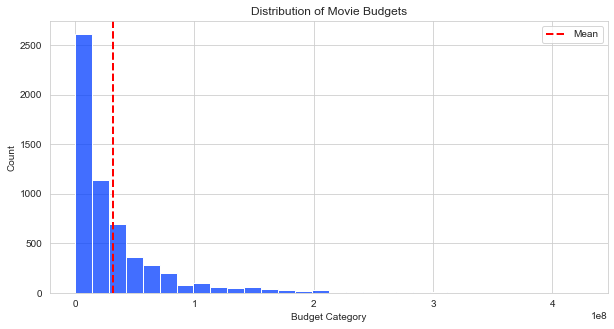

In [31]:
# Plot the distribution of movie budgets
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.figure(figsize=(10, 5))
sns.histplot(movie_budgets['production_budget'], bins=30)
plt.axvline(movie_budgets['production_budget'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget Category')
plt.ylabel('Count')
plt.legend()
plt.show()

In [32]:
#  Bin the production budget into three categories: Low, Medium, High
labels = ['Low', 'Medium', 'High']
bins = [0, 40000000, 100000000, movie_budgets['production_budget'].max()]
binned_budgets = movie_budgets.copy()
binned_budgets['budget_category'] = pd.cut(binned_budgets['production_budget'], bins=bins, labels=labels)
counts = binned_budgets.value_counts('budget_category').to_frame()
counts.reset_index(inplace=True)
counts

,budget_category,0
0,Low,4408
1,Medium,1011
2,High,363


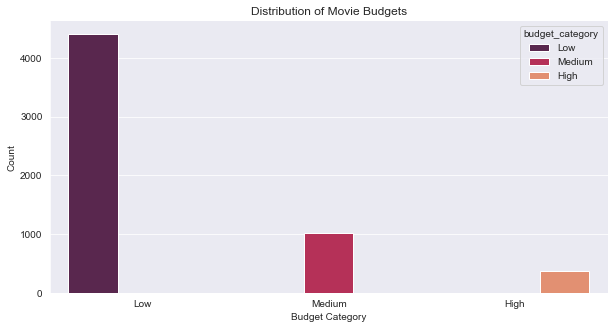

In [33]:
# Create a visualization of the distribution of movie budgets
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.barplot(x='budget_category', y=0, data=counts, hue='budget_category', palette='rocket')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget Category')
plt.ylabel('Count')
sns.despine()
plt.show()

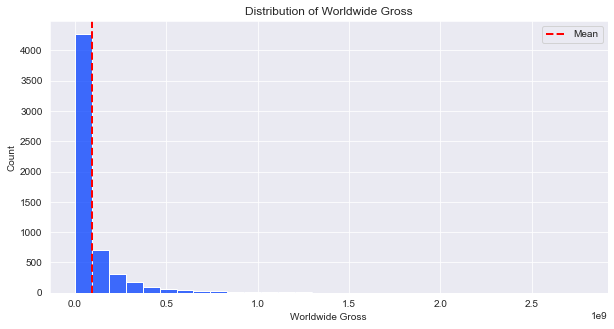

In [34]:
# Create a visualization of the distribution of worldwide gross
plt.figure(figsize=(10, 5))
sns.histplot(movie_budgets['worldwide_gross'], bins=30)
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Count')
plt.axvline(movie_budgets['worldwide_gross'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.show()

In [35]:
# Bin the worldwide gross into three categories: Low, Medium, High
bins = [0, 25000000, 100000000, binned_budgets['worldwide_gross'].max()]
labels = ['Low', 'Medium', 'High']
binned_budgets['gross_category'] = pd.cut(binned_budgets['worldwide_gross'], bins=bins, labels=labels)
counts = binned_budgets.value_counts('gross_category').to_frame()
counts.reset_index(inplace=True)

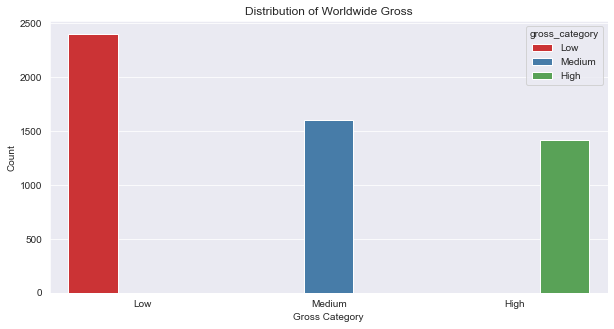

In [37]:
# Plot the distribution of worldwide gross categories
plt.figure(figsize=(10, 5))
sns.barplot(x='gross_category', y=0, data=counts, hue='gross_category', palette='Set1')
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Gross Category')
plt.ylabel('Count')
plt.show()

### IMDB 

In [38]:
# Assign the movie_basics info to movie_basics df
movie_basics = pd.read_sql("""
SELECT 
    movie_id, primary_title, genres
FROM movie_basics""",conn)
movie_basics.head()

,movie_id,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [39]:
# Assign the ovie ratings info to movie_ratiings df
movie_ratings = pd.read_sql("""
SELECT
    movie_id, averagerating
FROM movie_ratings""",conn)
movie_ratings.head()

,movie_id,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


In [40]:
# Assign the directors to directors df
directors = pd.read_sql("""
SELECT 
    movie_id, person_id, primary_name AS director_name
FROM directors
INNER JOIN persons
USING(person_id)
""",conn)
directors.head()

,movie_id,person_id,director_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0462036,nm1940585,Bill Haley
2,tt0835418,nm0151540,Jay Chandrasekhar
3,tt0878654,nm0089502,Albert Pyun
4,tt0878654,nm2291498,Joe Baile


In [41]:
# Assign actors in the database to a actors df
actors = pd.read_sql("""
SELECT 
    movie_id, person_id, primary_name AS actor_name
FROM principals
INNER JOIN persons
USING(person_id)
WHERE category = 'actor' 
""",conn)
actors.head()

,movie_id,person_id,actor_name
0,tt0111414,nm0246005,Tommy Dysart
1,tt0323808,nm2694680,Henry Garrett
2,tt0323808,nm0574615,Graham McTavish
3,tt0417610,nm0532721,Luis Machín
4,tt0417610,nm0069209,Carlos Belloso


In [42]:
# Explode the genres column in the movie_basics DataFrame
movie_basics['genres'] = movie_basics['genres'].str.split(',')
movie_basics_exploded = movie_basics.explode('genres')

In [43]:
# Merge the movie basics exploded df with the movie ratings df
imdb_exploded = movie_basics_exploded.merge(movie_ratings, on='movie_id', how='inner')
imdb_exploded.head()

,movie_id,primary_title,genres,averagerating
0,tt0063540,Sunghursh,Action,7.0
1,tt0063540,Sunghursh,Crime,7.0
2,tt0063540,Sunghursh,Drama,7.0
3,tt0066787,One Day Before the Rainy Season,Biography,7.2
4,tt0066787,One Day Before the Rainy Season,Drama,7.2


In [44]:
# Merge the exploded imdb dataframe with the movie_budgets dataframe
imdb_revenue_exploded = imdb_exploded.merge(movie_budgets, left_on='primary_title', right_on='movie',how='inner')

imdb_revenue_exploded.head()

,movie_id,primary_title,genres,averagerating,movie,production_budget,worldwide_gross
0,tt0249516,Foodfight!,Action,1.9,Foodfight!,45000000,73706
1,tt0249516,Foodfight!,Animation,1.9,Foodfight!,45000000,73706
2,tt0249516,Foodfight!,Comedy,1.9,Foodfight!,45000000,73706
3,tt0337692,On the Road,Adventure,6.1,On the Road,25000000,9313302
4,tt0337692,On the Road,Drama,6.1,On the Road,25000000,9313302


In [45]:
# Merge the imdb df with the directors df
imdb_directors = imdb_revenue_exploded.merge(directors, on='movie_id', how='inner')
imdb_directors = imdb_directors.drop(columns=['person_id'])
imdb_directors.head()

,movie_id,primary_title,genres,averagerating,movie,production_budget,worldwide_gross,director_name
0,tt0249516,Foodfight!,Action,1.9,Foodfight!,45000000,73706,Lawrence Kasanoff
1,tt0249516,Foodfight!,Animation,1.9,Foodfight!,45000000,73706,Lawrence Kasanoff
2,tt0249516,Foodfight!,Comedy,1.9,Foodfight!,45000000,73706,Lawrence Kasanoff
3,tt0337692,On the Road,Adventure,6.1,On the Road,25000000,9313302,Walter Salles
4,tt0337692,On the Road,Drama,6.1,On the Road,25000000,9313302,Walter Salles


In [46]:
# Merge the imdb_directors df with the actors df
imdb_crew = imdb_directors.merge(actors, on='movie_id', how='inner')
imdb_crew = imdb_crew.drop(columns=['person_id','movie'], axis=1)
imdb_crew.head()

,movie_id,primary_title,genres,averagerating,production_budget,worldwide_gross,director_name,actor_name
0,tt0249516,Foodfight!,Action,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
1,tt0249516,Foodfight!,Animation,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
2,tt0249516,Foodfight!,Comedy,1.9,45000000,73706,Lawrence Kasanoff,Charlie Sheen
3,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Sam Riley
4,tt0337692,On the Road,Adventure,6.1,25000000,9313302,Walter Salles,Garrett Hedlund


### Ojective 1
#### To determine which movie genres perform highly in terms of revenue and viewer rating.
>**Hypothesis**
>
>H0 - There is not sifnificant difference between genres and average rating
>
>H1 - There is significant difference between genres and average rating

First, we will visualize the average rating by genre to distinguish genres that have high rating

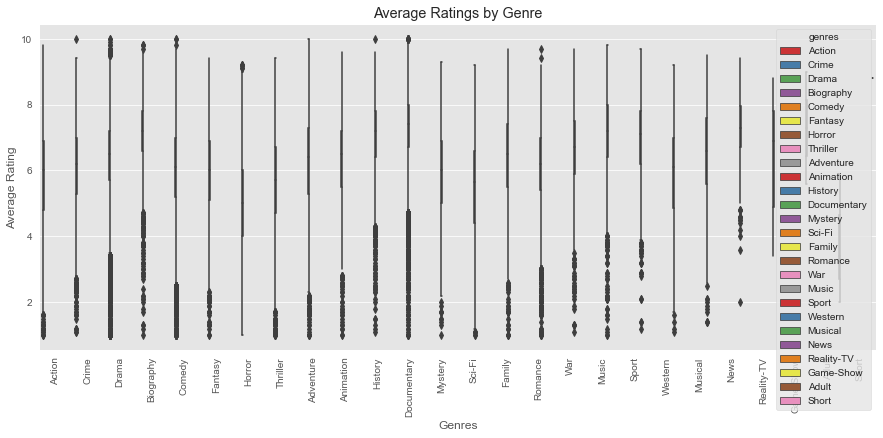

In [47]:
# Visualize the average rating by genre
plt.style.use('ggplot')
plt.figure(figsize=(15,6))
sns.boxplot(x='genres', y='averagerating', data=imdb_exploded, hue='genres', palette='Set1')
plt.title('Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Group by genre and calculate the average rating**                                                 
Calculation of average rating and grouping by genre will help us examine genres that have acquired high rating

In [48]:
# Group by genre and calculate the average rating
best_genres = imdb_exploded.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10).to_frame()
best_genres.reset_index(inplace=True)
best_genres

,genres,averagerating
0,Short,8.800000
1,Documentary,7.332090
2,Game-Show,7.300000
3,News,7.271330
4,Biography,7.162274
5,Music,7.091972
6,History,7.040956
7,Sport,6.961493
8,War,6.584291
9,Reality-TV,6.500000


**Visualization of the above using a bar plot;**

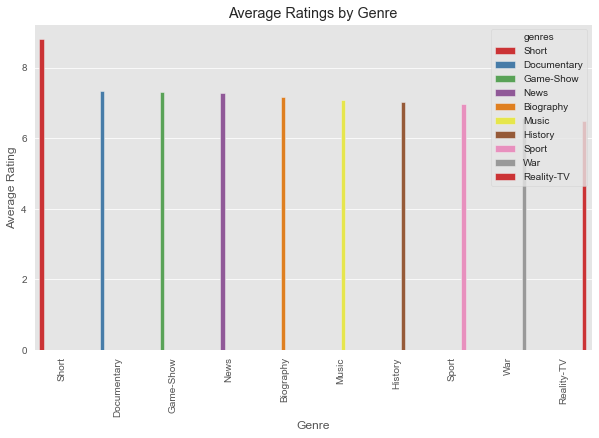

In [49]:
# Visualize the average rating by genre using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='genres', y='averagerating', data=best_genres, hue='genres', palette='Set1')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Group by genre and calculate the average worldwide gross**                                                      
We examine the genres that have attracted highest worldwide gross through calculation of the average world gross and grouping by genre

In [50]:
# Group by genre and calculate the average worldwide gross
genre_revenue = imdb_revenue_exploded.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False).to_frame().head(10)
genre_revenue.reset_index(inplace=True)

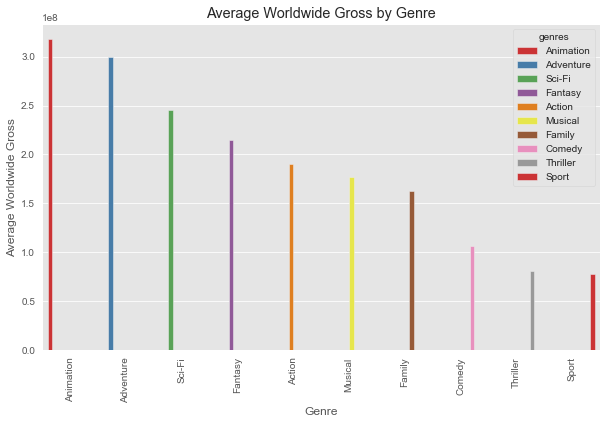

In [51]:
# Visualize the average worldwide gross by genre using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='genres',y='worldwide_gross', data=genre_revenue, hue='genres', palette='Set1')
plt.title('Average Worldwide Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross')
plt.xticks(rotation=90)
plt.show()

In [58]:
# Create a list of the top ten genres by worldwide gross
genre_list = genre_revenue['genres'].to_list()


**Findings**
1. Top 3 Genre that performs well in worldwide gross are Animations,Adventure and Sci-Fi
2. Genres with high average ratings are short,Documentary and Game Show with 8.80,7.33 and 7.30 rating respectively

**Check If there is significant difference in Average ratings between genres**

In [54]:
# Perform ANOVA to check if there is a significant difference in average ratings between genres
anova_data = [imdb_exploded[imdb_exploded['genres'] == genre]['averagerating'] for genre in genre_list]
f_stat, p_val = stats.f_oneway(*anova_data)
if p_val < 0.05:
    print("Reject H0: There is a significant difference in average ratings between genres.")
else:
    print("Fail to reject H0: {There is no significant difference in average ratings between genres.}")


Reject H0: There is a significant difference in average ratings between genres.


**Interpretation:**                                                                
From the above, there is statistical evidence that average ratings significantly 
differ between at least some genres.                                                                      
This means genre does influence how movies are rated on average.



**Business Recommendation**                                                                               
Genre that will yield higher worldwide gross is Animation while genre that have higher viewer satisfaction/rating is documentary